In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [13]:
tables = {
    "edu_alfabetizacao": None,
    #"edu_alunos_por_serie": None,
    #"edu_pessoas_por_ano_de_estudo": None,
    "indic_soc_60_anos_contribuintes_no_rendimento_mensal": None,
    "indic_soc_aposentados_ou_pensionistas": None,
    "indic_soc_criancas_14_anos_com_responsaveis_menos_4_anos_estudo": None,
    "indic_soc_destino_do_lixo": None,
    #"indic_soc_domicilios_particulares_por_rendimento_medio_mensal": None,
    #"indic_soc_domicilios_rurais_com_agua": None,
    #"indic_soc_domicilios_urbanos_com_agua": None,
    "indic_soc_esgotamento_sanitario": None,
    "indic_soc_moradores_por_domicilio": None,
    "indic_soc_pessoas_com_menos_de_4_anos_de_estudo": None,
    "indic_soc_pessoas_ocupadas_contribuintes": None,
    "indic_soc_pessoas_ocupadas_por_ocupacao": None,
    "indic_soc_pessoas_ocupadas": None,
    "indic_soc_populacao_por_cor": None,
    #"indic_soc_populacao_residente": None,
    "indic_soc_populacao": None,
    "indic_soc_taxa_de_escolarizacao": None,
    "trab_empregados_trabalho_principal": None,
    "trab_horas_trabalhadas": None,
    "trab_pessoas_economicamente_ativas_e_ocupadas": None,
    "trab_rendimento_mediano_mensal": None
}

for table_name in tables:
    filepath = 'data/censo_2000_pe/csv/' + table_name + '.csv'
    table = pd.read_csv(filepath, encoding='utf8', delimiter=';', na_filter=True)
    
    if 'codigo_unidade_geografica' in table.columns:
        table['codigo_unidade_geografica'] = table['codigo_unidade_geografica'].apply(lambda x: str(x)[:-1])
        table.set_index('codigo_unidade_geografica', inplace=True)
        
        if 'municipio' in table.columns:
                table.drop('municipio', axis=1, inplace=True)

        if 'municipios' in table.columns:
                table.drop('municipios', axis=1, inplace=True)
    
    for column in table.columns:
        if column not in ['codigo_unidade_geografica','municipio']:
            table[column] = table[column].apply(lambda x: str(x).replace(' ','').replace(',','.').replace('-',str(np.nan)))
            table[column] = table[column].astype('float64')
        
    tables[table_name] = table

In [14]:
homicidios = pd.read_csv('data/censo_2000_pe/agressoes_arma_de_fogo_2000.csv', encoding='latin1' ,na_filter=True)
homicidios['codigo_unidade_geografica'] = homicidios['codigo_unidade_geografica'].apply(lambda x: str(x).replace('.','')[:-1])
homicidios.rename(columns={'2000':'homicidios'}, inplace=True)
homicidios = homicidios.replace('-', np.nan)
homicidios.set_index('codigo_unidade_geografica', inplace=True)
homicidios.dropna(axis=0, how='any', inplace=True)
homicidios.homicidios = homicidios.homicidios.astype('int64')
homicidios.head()

,homicidios
codigo_unidade_geografica,
110001,1
110034,3
110002,31
110045,8
110060,1


In [15]:
homicidios_edu_alfabetizacao = pd.concat([homicidios, tables['edu_alfabetizacao']], axis=1, join='inner').dropna()

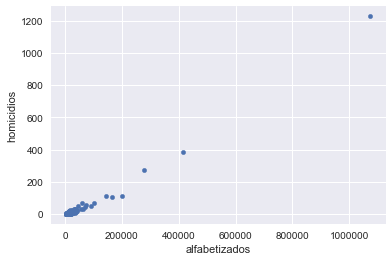

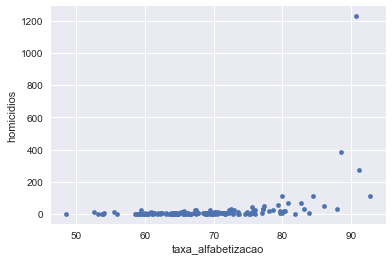

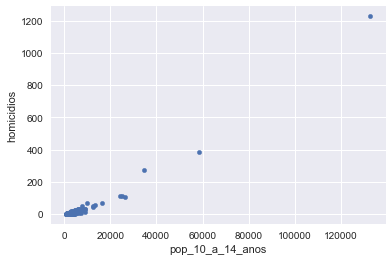

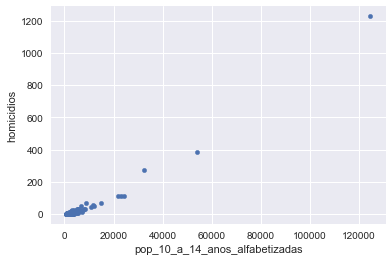

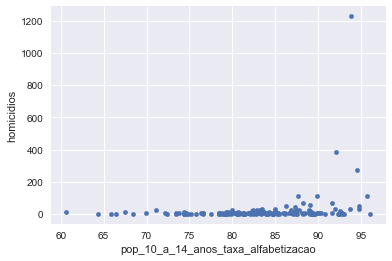

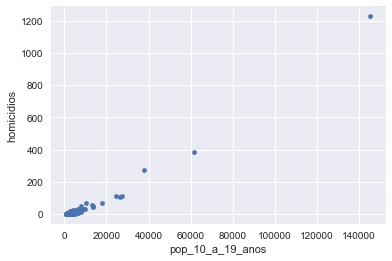

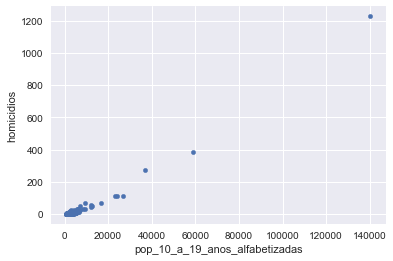

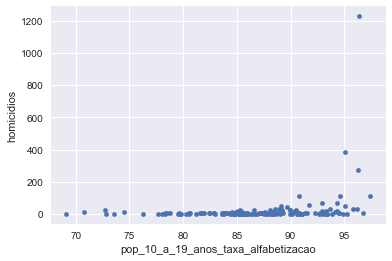

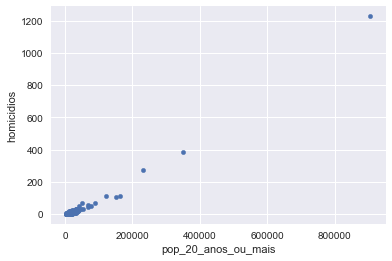

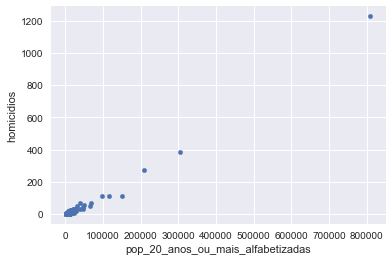

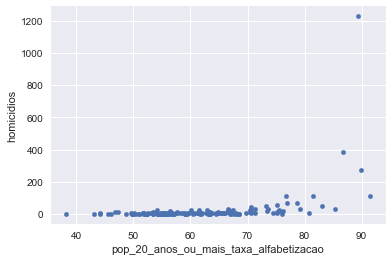

In [16]:
for column in homicidios_edu_alfabetizacao.columns:
    if column is not 'homicidios':
        homicidios_edu_alfabetizacao.plot.scatter(x=column, y='homicidios')

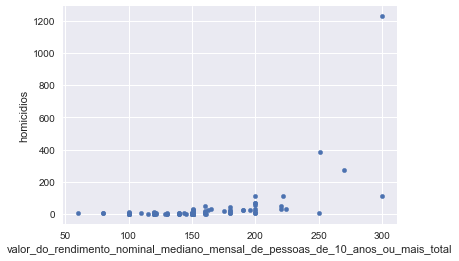

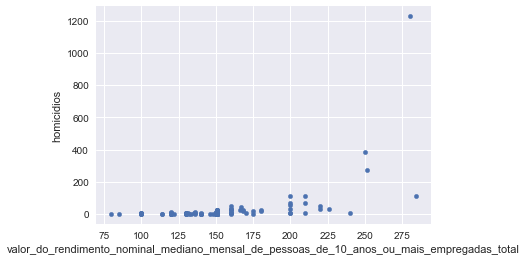

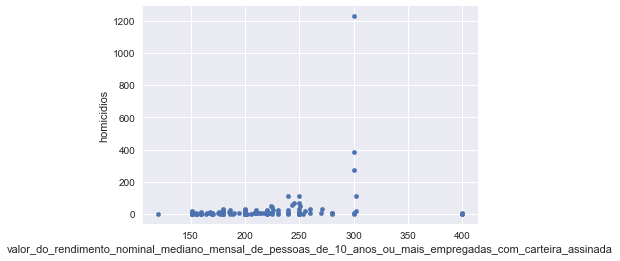

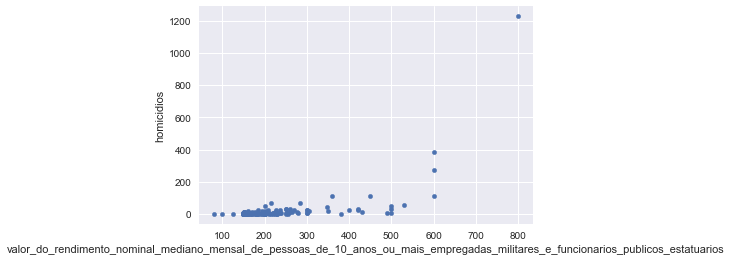

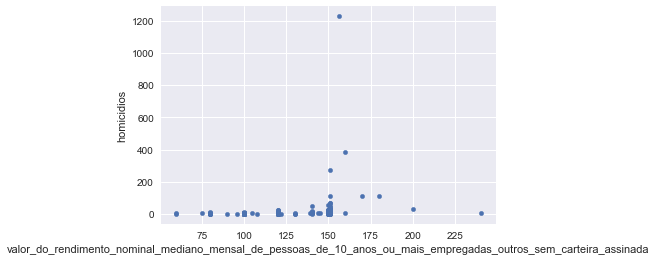

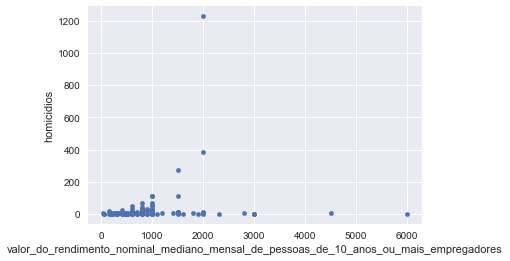

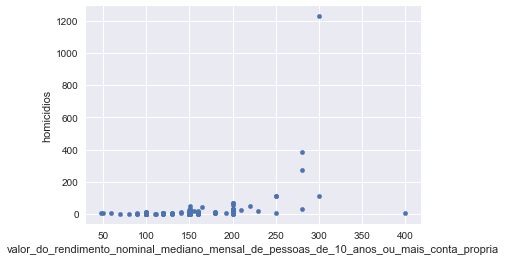

In [17]:
homicidios_trab_rendimento_mediano_mensal = pd.concat([homicidios, tables['trab_rendimento_mediano_mensal']], axis=1, join='inner').dropna()
for column in homicidios_trab_rendimento_mediano_mensal.columns:
    if column is not 'homicidios':
        homicidios_trab_rendimento_mediano_mensal.plot.scatter(x=column, y='homicidios')

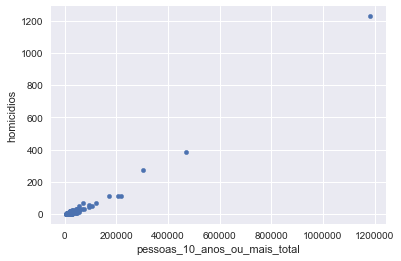

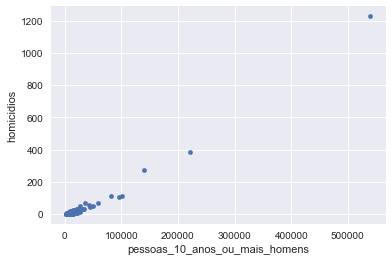

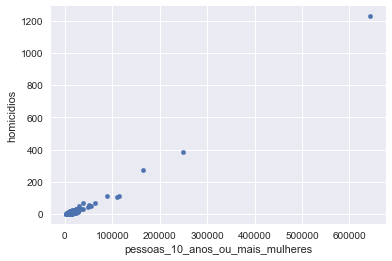

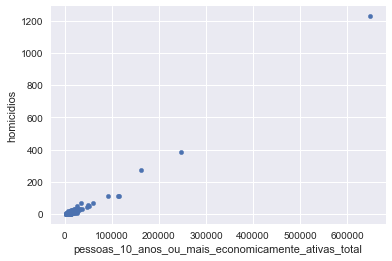

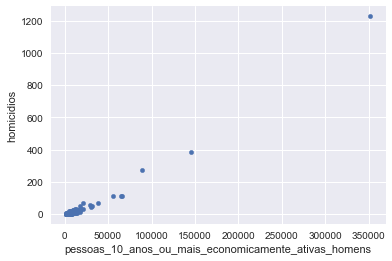

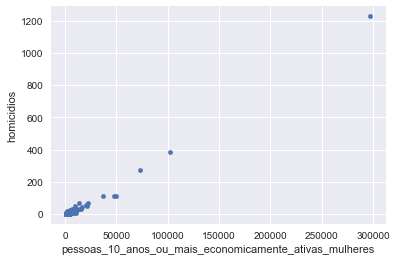

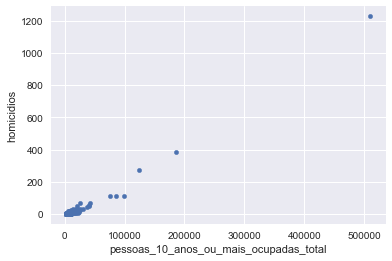

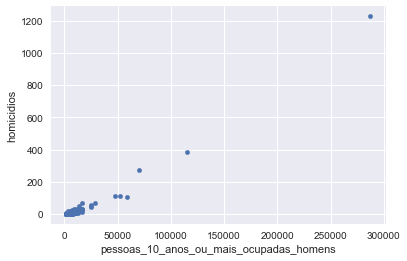

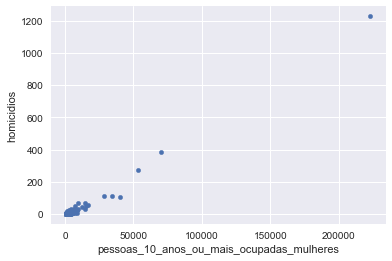

In [18]:
homicidios_trab_pessoas_economicamente_ativas_e_ocupadas = pd.concat([homicidios, tables['trab_pessoas_economicamente_ativas_e_ocupadas']], axis=1, join='inner').dropna()
for column in homicidios_trab_pessoas_economicamente_ativas_e_ocupadas.columns:
    if column is not 'homicidios':
        homicidios_trab_pessoas_economicamente_ativas_e_ocupadas.plot.scatter(x=column, y='homicidios')

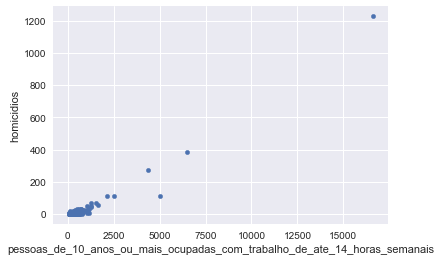

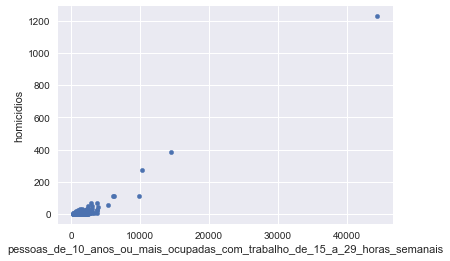

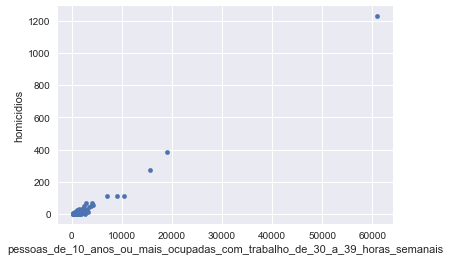

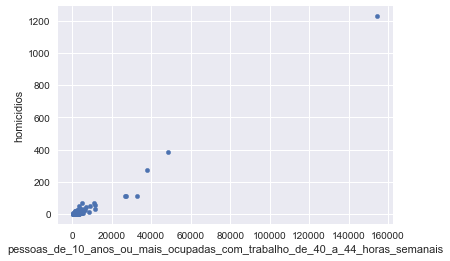

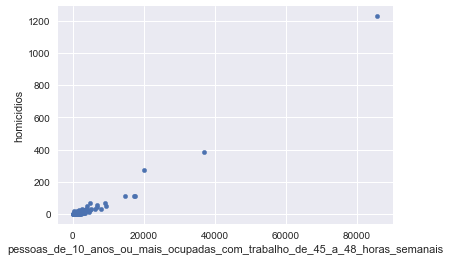

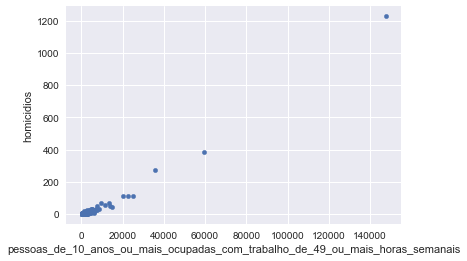

In [19]:
homicidios_trab_horas_trabalhadas = pd.concat([homicidios, tables['trab_horas_trabalhadas']], axis=1, join='inner').dropna()
for column in homicidios_trab_horas_trabalhadas.columns:
    if column is not 'homicidios':
        homicidios_trab_horas_trabalhadas.plot.scatter(x=column, y='homicidios')

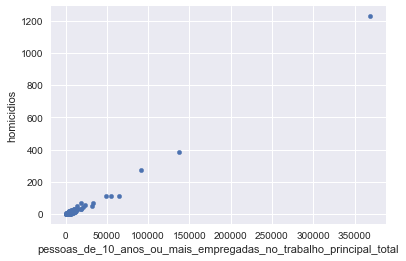

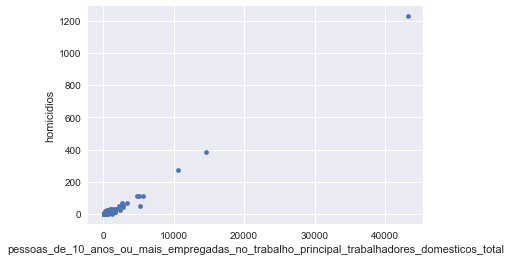

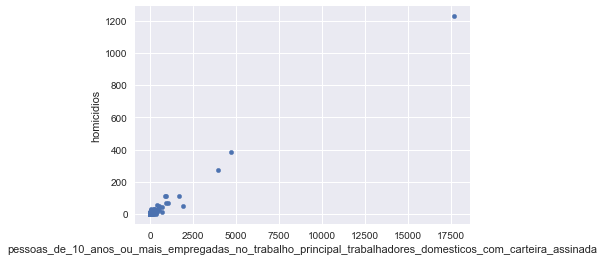

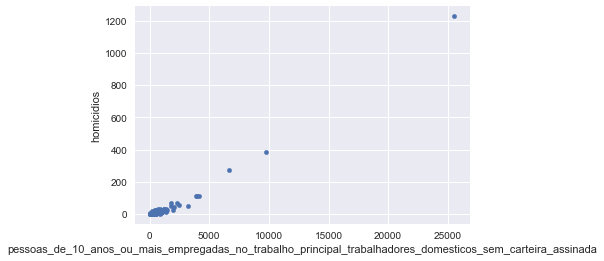

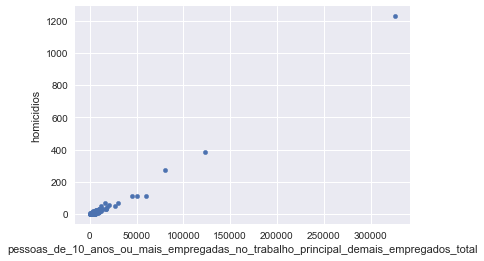

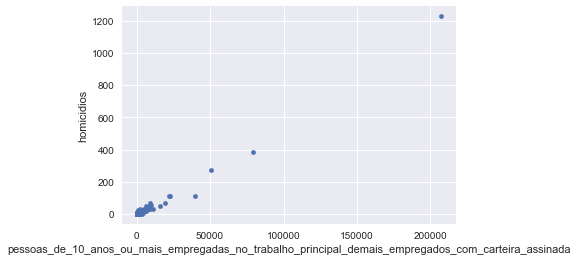

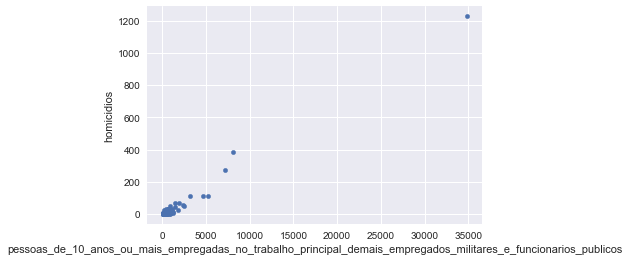

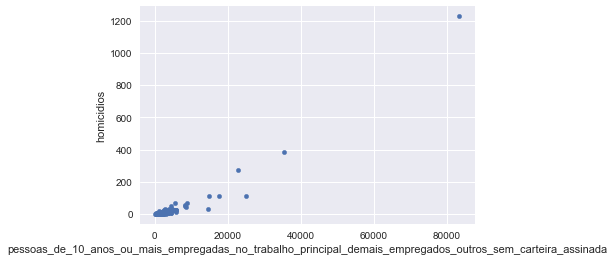

In [20]:
homicidios_trab_empregados_trabalho_principal = pd.concat([homicidios, tables['trab_empregados_trabalho_principal']], axis=1, join='inner').dropna()
for column in homicidios_trab_empregados_trabalho_principal.columns:
    if column is not 'homicidios':
        homicidios_trab_empregados_trabalho_principal.plot.scatter(x=column, y='homicidios')